In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys 
import os
sys.path.append(os.path.abspath("../"))

In [2]:
from qrcode import QRCodeReader, BitMatrix

QR Code format error.


In [3]:
img = cv2.imread("C:\\Users\\vuong\\Downloads\\symmetry-13-02446-g007.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(752, 756, 3)


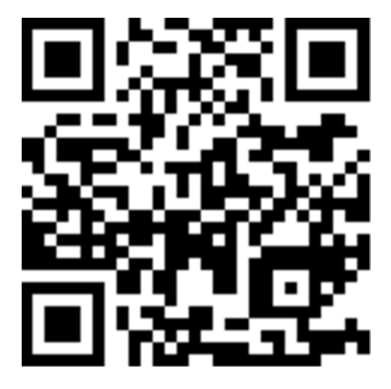

In [4]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [26]:
import pathlib
from ultralytics import YOLO

# Định nghĩa đường dẫn đến mô hình và ảnh
model_path = "D:\\HK5\\CS406\\TestQR3\\exportmodel\\best2.pt"
# image_path = pathlib.Path("D:\\Data_QR\\data\\qr_2039.jpg")
image_path = pathlib.Path("D:\Data_QR\data\qr_770.jpg")
# Tải mô hình
model = YOLO(model_path)

# Dự đoán trên ảnh với các tùy chọn bổ sung
result = model.predict(source=image_path , conf=0.6, save=True, device='cpu')



image 1/1 D:\Data_QR\data\qr_770.jpg: 448x640 1 qr, 102.1ms
Speed: 1.0ms preprocess, 102.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict200


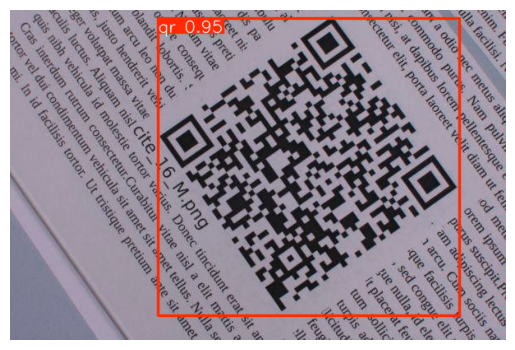

In [27]:
# Hiển thị ảnh (tùy chọn)
img_with_boxes = result[0].plot()
plt.imshow(img_with_boxes)
plt.axis('off')  # Ẩn trục
plt.show()  # Hiển thị ảnh

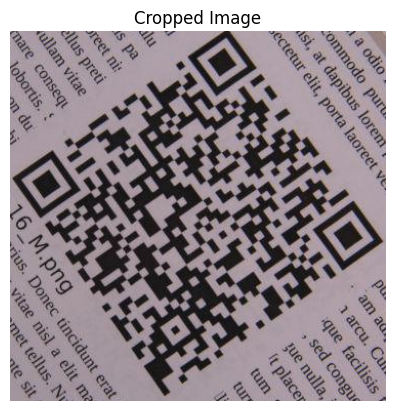

In [28]:
# Đọc ảnh gốc
image = cv2.imread(str(image_path))

# Khởi tạo biến image_crop
image_crop = image

# Lấy bounding box có độ tin cậy cao nhất
for idx, result in enumerate(result):
    if len(result.boxes) > 0:
        # Sắp xếp các box theo độ tin cậy từ cao đến thấp và lấy box đầu tiên
        best_box = sorted(result.boxes, key=lambda box: box.conf[0], reverse=True)[0]
        x_min, y_min, x_max, y_max = map(int, best_box.xyxy[0])  # Lấy tọa độ dạng int

        # Cắt ảnh trong bounding box
        image_crop = image[y_min:y_max, x_min:x_max]
        image_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB)
        # Hiển thị hình ảnh đã cắt
        plt.imshow(image_crop)  # Chuyển đổi màu BGR sang RGB
        plt.axis('off')  # Ẩn trục
        plt.title('Cropped Image')  # Tiêu đề cho hình ảnh
        plt.show()  # Hiển thị cửa sổ
    else:
        print(f"Image {idx + 1}: No bounding box detected.")

# CREATE BITMATRIX

# GRAY SCALE

In [29]:
print(image_crop.shape)
image_crop = cv2.resize(image_crop, (512,512))
print(image_crop.shape)

(361, 367, 3)
(512, 512, 3)


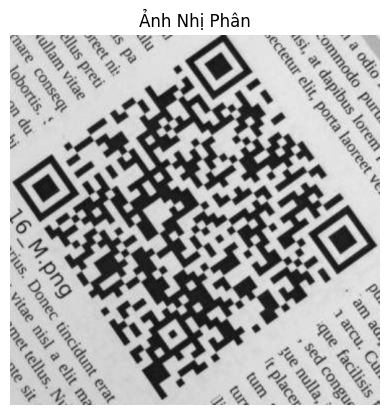

187


In [ ]:
from common import CV2ImageLuminanceSource
source = CV2ImageLuminanceSource(image_crop)
plt.imshow(source.image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Gray Scale')
plt.show()
print(np.max(source.image))

In [31]:
print(source.image.shape)

(512, 512)


In [32]:
from common import HybridBinarizer
binarizer = HybridBinarizer(source)

In [33]:
from qrcode import BinaryBitmap
bitmap = BinaryBitmap(binarizer)

end get black matrix


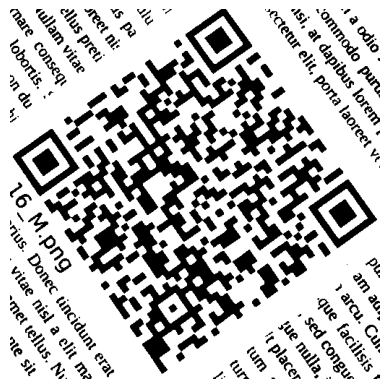

In [38]:
binary_img = bitmap.get_black_matrix().bitmatrix_to_image()
print(type(binary_img))
plt.imshow(binary_img, "gray")
plt.axis("off")
plt.show()

# CREATE QR CODE READER

In [34]:
reader = QRCodeReader()
res = reader.decode(bitmap)
# print(np.max(res.bits))
# print(np.min(res.bits))
# # Hiển thị ảnh nhị phân
# plt.imshow(res.bits, cmap='gray')
# plt.axis('off')  # Ẩn trục
# plt.title('Ảnh Nhị Phân')
# plt.show()

Detect
end get black matrix



Found point  289.5 44.5 11.857142857142858
New point  289.5 44.5 11.857142857142858



Found point  290.5 45.0 11.714285714285714
1
--------- posible module ----------
289.5 44.5 11.857142857142858 1
------- end possible module --------



Found point  289.0 43.5 11.857142857142858
1
--------- posible module ----------
290.0 44.75 11.785714285714285 2
------- end possible module --------



Found point  289.0 43.0 11.857142857142858
1
--------- posible module ----------
289.6666666666667 44.333333333333336 11.80952380952381 3
------- end possible module --------



Found point  287.5 41.0 11.857142857142858
1
--------- posible module ----------
289.5 44.0 11.821428571428573 4
------- end possible module --------



Found point  288.5 42.0 11.857142857142858
1
--------- posible module ----------
289.1 43.4 11.828571428571431 5
------- end possible module --------



Found point  51.0 213.5 11.714285714285714
1
--------- posible module ----------
289.0 43.1

In [35]:
print(type(res))

<class 'qr_patterns.DetectorResult.DetectorResult'>


In [36]:
img_result = res.bits.bitmatrix_to_image()
print(img_result.astype(np.uint8))

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 [0 0 0 ... 0 0 0]]


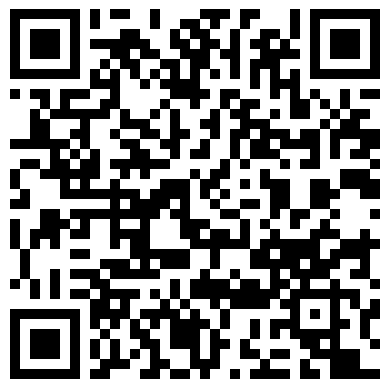

In [37]:
plt.imshow(img_result, "gray")
plt.axis("off")
plt.show()

In [24]:
print(type(img_result))

<class 'numpy.ndarray'>


In [25]:
print(img_result)

[[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1]
 [0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1]
 [1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0]
 [0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1]
 [0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0]
 [1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1]
 [1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1]
 [0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 

In [23]:
import cv2
from pyzbar.pyzbar import decode



# Decode mã QR/mã vạch trong ảnh
decoded_objects = decode(img_result)
print(decoded_objects)
# Duyệt qua tất cả các mã được tìm thấy trong ảnh
for obj in decoded_objects:
    print("Data:", obj.data.decode("utf-8"))  # Dữ liệu mã QR/mã vạch
    print("Type:", obj.type)  # Loại mã (QR_CODE, CODE128, v.v.)
    print("Bounding Box:", obj.rect)  # Tọa độ vùng chứa mã


[]


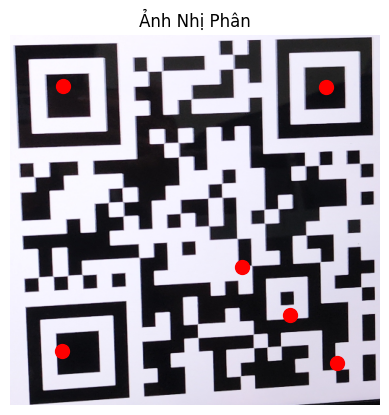

In [19]:
plt.imshow(image_crop)
plt.axis('off')  # Ẩn trục
plt.title('Ảnh Nhị Phân')

x = 72.5  # Tọa độ x
y = 70  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 437  # Tọa độ x
y = 70.5  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 72  # Tọa độ x
y = 437  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 321  # Tọa độ x
y = 321  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10)  

x = 453  # Tọa độ x
y = 453  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10) 

x = 387  # Tọa độ x
y = 387  # Tọa độ y
plt.plot(x, y, 'ro', markersize=10) 
plt.show()